In [1]:
library("scPred")
library("Seurat")
library("magrittr")
require(here)
proj_dir = here()



Attaching SeuratObject

Loading required package: here

here() starts at /beevol/home/davidson/checkouts/sc_bulk_ood



## Read in Data

In [2]:
# reference data
scpred_reference <- scPred::pbmc_1

# Load each PBMC dataset

data_path_3k = paste0(proj_dir, "/data/single_cell_data/pbmc3k/hg19/")
pbmc.data <- Read10X(data.dir = data_path_3k)
pbmc_3k <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)

data_path_6k = paste0(proj_dir, "/data/single_cell_data/pbmc6k/hg19/")
pbmc.data <- Read10X(data.dir = data_path_6k)
pbmc_6k <- CreateSeuratObject(counts = pbmc.data, project = "pbmc6k", min.cells = 3, min.features = 200)

data_path_68k = paste0(proj_dir, "/data/single_cell_data/pbmc68k/hg19/")
pbmc.data <- Read10X(data.dir = data_path_68k)
pbmc_68k <- CreateSeuratObject(counts = pbmc.data, project = "pbmc68k", min.cells = 3, min.features = 200)


data_path_pbmc2 = paste0(proj_dir, "/data/single_cell_data/GSE132044/10x_hg19/")
pbmc.data <- Read10X(data.dir = data_path_pbmc2)
pbmc2_10x <- CreateSeuratObject(counts = pbmc.data, project = "pbmc2_10x", min.cells = 3, min.features = 200)


data_path_pbmc1 = paste0(proj_dir, "/data/single_cell_data/GSE132044/sm2_hg19/")
pbmc.data <- Read10X(data.dir = data_path_pbmc1)
pbmc1_sm2 <- CreateSeuratObject(counts = pbmc.data, project = "pbmc1_sm2", min.cells = 3, min.features = 200)




Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


## Process metadata

### 68K Zheng data

In [3]:
# add 68K metadata
library(data.table)
metadata_68k_file = paste0(proj_dir, "/data/single_cell_data/pbmc68k/hg19/zheng17_bulk_lables.txt")
metadata_68k = data.frame(fread(metadata_68k_file, header=F, sep="\t"))

barcodes_68k_file = paste0(proj_dir, "/data/single_cell_data/pbmc68k/hg19/barcodes.tsv")
barcodes_68k = data.frame(fread(barcodes_68k_file, header=F, sep="\t"))

row.names(metadata_68k) = barcodes_68k[,1]
metadata_68k = metadata_68k[row.names(pbmc_68k@meta.data),]
metadata_68k = data.frame(metadata_68k)
row.names(metadata_68k) = row.names(pbmc_68k@meta.data)

pbmc_68k <- AddMetaData(
  object = pbmc_68k,
  metadata = metadata_68k,
  col.name = 'cell_type'
)

head(pbmc_68k)

,orig.ident,nCount_RNA,nFeature_RNA,cell_type
,<fct>,<dbl>,<int>,<chr>
AAACATACACCCAA-1,pbmc68k,1216,498,CD8+ Cytotoxic T
AAACATACCCCTCA-1,pbmc68k,1265,472,CD8+/CD45RA+ Naive Cytotoxic
AAACATACCGGAGA-1,pbmc68k,1322,542,CD4+/CD25 T Reg
AAACATACTAACCG-1,pbmc68k,854,349,CD19+ B
AAACATACTCTTCA-1,pbmc68k,1252,446,CD4+/CD25 T Reg
AAACATACTGGATC-1,pbmc68k,1324,476,CD4+/CD25 T Reg
AAACATACTGTCTT-1,pbmc68k,1259,522,CD4+/CD45RO+ Memory
AAACATACTTCTAC-1,pbmc68k,2683,925,CD8+ Cytotoxic T
AAACATTGCTGCTC-1,pbmc68k,1316,489,CD8+/CD45RA+ Naive Cytotoxic


### PBMC2 10x

In [4]:

# add pbmc2_10x metadata
library(plyr)
metadata_10x_file = paste0(proj_dir, "/data/single_cell_data/GSE132044/10x_hg19/GSE132044_meta.txt")
metadata_10x = data.frame(fread(metadata_10x_file, header=F, sep="\t"))

barcodes_10x_file = paste0(proj_dir, "/data/single_cell_data/GSE132044/10x_hg19/barcodes.tsv")
barcodes_10x = data.frame(fread(barcodes_10x_file, header=F, sep="\t"))

header_10x = metadata_10x[1,]
metadata_10x = metadata_10x[-c(1,2),]
colnames(metadata_10x) = header_10x

colnames(metadata_10x)[1] = "code"
colnames(barcodes_10x)[1] = "code"
metadata_10x = join(barcodes_10x, metadata_10x, by="code", type="left")
row.names(metadata_10x) = metadata_10x$code

metadata_10x = metadata_10x[row.names(pbmc2_10x@meta.data),]

pbmc2_10x <- AddMetaData(
  object = pbmc2_10x,
  metadata = metadata_10x
)

# get subset
pbmc2_10x_sub = subset(pbmc2_10x, subset = Experiment == "pbmc2")
pbmc2_10x_sub = subset(pbmc2_10x_sub, subset = Method == "10x Chromium (v2)")
head(pbmc2_10x_sub)


Attaching package: ‘plyr’


The following object is masked from ‘package:here’:

    here




,orig.ident,nCount_RNA,nFeature_RNA,code,nGene,nUMI,percent.mito,Cluster,CellType,Experiment,Method
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
pbmc2_10X_V2_AAACCTGAGATGGGTC,pbmc2,2360,1044,pbmc2_10X_V2_AAACCTGAGATGGGTC,1044,2360,0.0419491525423729,2,B cell,pbmc2,10x Chromium (v2)
pbmc2_10X_V2_AAACCTGAGCGTAATA,pbmc2,1888,803,pbmc2_10X_V2_AAACCTGAGCGTAATA,803,1888,0.0413135593220339,2,B cell,pbmc2,10x Chromium (v2)
pbmc2_10X_V2_AAACCTGAGCTAGGCA,pbmc2,3455,1371,pbmc2_10X_V2_AAACCTGAGCTAGGCA,1372,3456,0.0353009259259259,1,Cytotoxic T cell,pbmc2,10x Chromium (v2)
pbmc2_10X_V2_AAACCTGAGGGTCTCC,pbmc2,3801,1518,pbmc2_10X_V2_AAACCTGAGGGTCTCC,1519,3802,0.0420831141504471,6,Dendritic cell,pbmc2,10x Chromium (v2)
pbmc2_10X_V2_AAACCTGGTCCGAACC,pbmc2,3826,1451,pbmc2_10X_V2_AAACCTGGTCCGAACC,1451,3826,0.0371144798745426,0,CD4+ T cell,pbmc2,10x Chromium (v2)
pbmc2_10X_V2_AAACCTGTCGTCCGTT,pbmc2,2343,929,pbmc2_10X_V2_AAACCTGTCGTCCGTT,931,2345,0.0652452025586354,0,CD4+ T cell,pbmc2,10x Chromium (v2)
pbmc2_10X_V2_AAACCTGTCGTCGTTC,pbmc2,2262,852,pbmc2_10X_V2_AAACCTGTCGTCGTTC,852,2262,0.024314765694076,0,CD4+ T cell,pbmc2,10x Chromium (v2)
pbmc2_10X_V2_AAACCTGTCTTGTACT,pbmc2,5801,1895,pbmc2_10X_V2_AAACCTGTCTTGTACT,1895,5801,0.034304430270643,2,B cell,pbmc2,10x Chromium (v2)
pbmc2_10X_V2_AAACGGGAGTGCAAGC,pbmc2,876,524,pbmc2_10X_V2_AAACGGGAGTGCAAGC,524,876,0.0753424657534247,4,B cell,pbmc2,10x Chromium (v2)


### PBMC1 sm2

In [5]:
# add pbmc1_sm2 metadata
library(plyr)
metadata_sm2_file = paste0(proj_dir, "/data/single_cell_data/GSE132044/sm2_hg19/GSE132044_meta.txt")
metadata_sm2 = data.frame(fread(metadata_sm2_file, header=F, sep="\t"))

barcodes_sm2_file = paste0(proj_dir, "/data/single_cell_data/GSE132044/sm2_hg19/barcodes.tsv")
barcodes_sm2 = data.frame(fread(barcodes_sm2_file, header=F, sep="\t"))

header_sm2 = metadata_sm2[1,]
metadata_sm2 = metadata_sm2[-c(1,2),]
colnames(metadata_sm2) = header_sm2

colnames(metadata_sm2)[1] = "code"
colnames(barcodes_sm2)[1] = "code"
metadata_sm2 = join(barcodes_sm2, metadata_sm2, by="code", type="left")
row.names(metadata_sm2) = metadata_sm2$code

metadata_sm2 = metadata_sm2[row.names(pbmc1_sm2@meta.data),]

pbmc1_sm2 <- AddMetaData(
  object = pbmc1_sm2,
  metadata = metadata_sm2
)

# get subset
pbmc1_sm2_sub = subset(pbmc1_sm2, subset = Experiment == "pbmc1")
pbmc1_sm2_sub = subset(pbmc1_sm2_sub, subset = Method == "Smart-seq2")
head(pbmc1_sm2_sub)

,orig.ident,nCount_RNA,nFeature_RNA,code,nGene,nUMI,percent.mito,Cluster,CellType,Experiment,Method
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
pbmc1_SM2_Cell_108,pbmc1,436753,2197,pbmc1_SM2_Cell_108,2200,437125,0.0297434465355702,0,Cytotoxic T cell,pbmc1,Smart-seq2
pbmc1_SM2_Cell_115,pbmc1,335592,2436,pbmc1_SM2_Cell_115,2438,335596,0.0311521658159055,0,Cytotoxic T cell,pbmc1,Smart-seq2
pbmc1_SM2_Cell_133,pbmc1,302204,1874,pbmc1_SM2_Cell_133,1874,302204,0.0431128105727693,0,Cytotoxic T cell,pbmc1,Smart-seq2
pbmc1_SM2_Cell_142,pbmc1,377408,2479,pbmc1_SM2_Cell_142,2480,377420,0.0260323569927476,0,Cytotoxic T cell,pbmc1,Smart-seq2
pbmc1_SM2_Cell_143,pbmc1,385513,2195,pbmc1_SM2_Cell_143,2196,385514,0.0404759383962183,0,Cytotoxic T cell,pbmc1,Smart-seq2
pbmc1_SM2_Cell_144,pbmc1,304952,2214,pbmc1_SM2_Cell_144,2216,304994,0.023409951391094,0,Cytotoxic T cell,pbmc1,Smart-seq2
pbmc1_SM2_Cell_146,pbmc1,410221,2327,pbmc1_SM2_Cell_146,2331,410522,0.0266065031418581,0,Cytotoxic T cell,pbmc1,Smart-seq2
pbmc1_SM2_Cell_148,pbmc1,335187,2075,pbmc1_SM2_Cell_148,2075,335187,0.0446061115049967,0,Cytotoxic T cell,pbmc1,Smart-seq2
pbmc1_SM2_Cell_152,pbmc1,485522,2829,pbmc1_SM2_Cell_152,2830,485530,0.0234517593805909,5,Cytotoxic T cell,pbmc1,Smart-seq2


## Train Reference Model -- Zheng 2017, 68K

Centering and scaling data matrix

PC_ 1 
Positive:  CST3, SPI1, LST1, SERPINA1, LYZ, FCN1, CFD, RP11-290F20.3, IFI30, CD68 
	   AIF1, MS4A7, PILRA, HCK, TMEM176B, TYMP, FCER1G, LRRC25, HLA-DRB1, HLA-DRA 
	   CFP, TYROBP, HLA-DRB5, HLA-DPA1, S100A9, HLA-DPB1, HMOX1, IGSF6, PSAP, LILRB2 
Negative:  RPS6, RPL13, LTB, RPS2, IL32, CD7, RPL34, IL7R, CCR7, JUN 
	   CD8B, CTSW, AQP3, CCL5, PASK, RP11-291B21.2, CD8A, GZMK, NGFRAP1, FKBP11 
	   MYC, JUNB, HIST1H1D, GZMA, DUSP2, LYAR, CRIP2, KLRG1, RPLP1, XBP1 
PC_ 2 
Positive:  LTB, RPL13, RPS2, CD79A, HLA-DRA, TCL1A, RPL34, CD79B, MS4A1, RPS6 
	   RPLP1, LINC00926, HLA-DQA1, VPREB3, FCER2, HLA-DQA2, JUNB, HLA-DMA, HLA-DMB, HLA-DOB 
	   LY86, SPIB, HVCN1, BANK1, FCRLA, EAF2, HLA-DQB1, CCR7, BLK, HLA-DRB1 
Negative:  NKG7, GNLY, CST7, GZMB, GZMA, FGFBP2, CCL5, GZMH, PRF1, CTSW 
	   HOPX, CLIC3, FCGR3A, SPON2, CCL4, TYROBP, SRGN, MATK, PRSS23, CD63 
	   S1PR5, PFN1, KLRD1, IGFBP7, TMSB4X, GPR56, S100A4, RHOC, IFITM2, ABI3 
PC_ 3 
Positive:  JUNB,

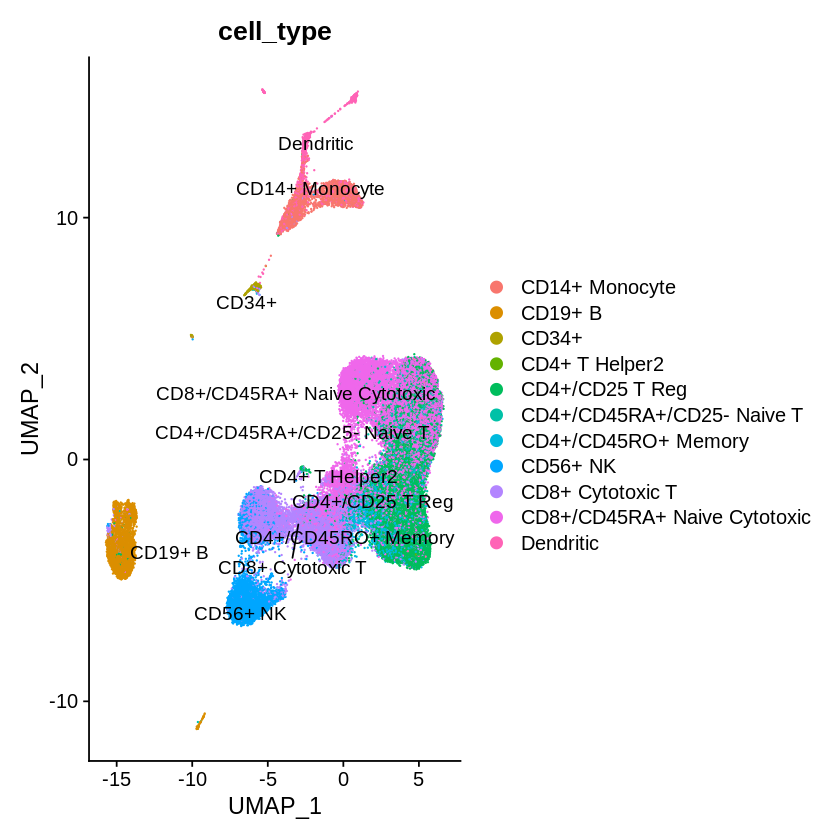

In [6]:
reference <- pbmc_68k %>% 
  NormalizeData() %>% 
  FindVariableFeatures() %>% 
  ScaleData() %>% 
  RunPCA() %>% 
  RunUMAP(dims = 1:30)

DimPlot(reference, group.by = "cell_type", label = TRUE, repel = TRUE)

In [7]:
# now train
reference <- getFeatureSpace(reference, "cell_type")
reference <- trainModel(reference)
get_scpred(reference)

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom



●  Extracting feature space for each cell type...
DONE!
●  Training models for each cell type...


Loading required package: lattice

Loading required package: ggplot2



In [ ]:
plot_probabilities(reference)